In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df = pd.read_csv("/content/clean_df.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [3]:
df.dtypes

,0
Unnamed: 0,int64
symboling,int64
normalized-losses,int64
make,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [4]:
print(df.dtypes)

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object


In [6]:
# Find correlate between numerical variables
df_numeric = df.select_dtypes(include=['number'])
correlate_matrix = df_numeric.corr()
print(correlate_matrix)

                   Unnamed: 0  symboling  normalized-losses  wheel-base  \
Unnamed: 0           1.000000  -0.162764          -0.241092    0.125517   
symboling           -0.162764   1.000000           0.466264   -0.535987   
normalized-losses   -0.241092   0.466264           1.000000   -0.056661   
wheel-base           0.125517  -0.535987          -0.056661    1.000000   
length               0.161848  -0.365404           0.019424    0.876024   
width                0.043976  -0.242423           0.086802    0.814507   
height               0.252015  -0.550160          -0.373737    0.590742   
curb-weight          0.064820  -0.233118           0.099404    0.782097   
engine-size         -0.047764  -0.110581           0.112360    0.572027   
bore                -0.162490  -0.008153           0.055045    0.158018   
stroke               0.244734  -0.140019          -0.029862    0.493244   
compression-ratio    0.144301  -0.182196          -0.114713    0.250313   
horsepower          -0.02

In [7]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()    # Find the correlate between those columns in the "df".

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.187871,0.098128
stroke,-0.055390,1.000000,0.001263,0.566903
compression-ratio,0.187871,0.001263,1.000000,-0.214489
horsepower,0.098128,0.566903,-0.214489,1.000000


(0.0, 53217.16498933929)

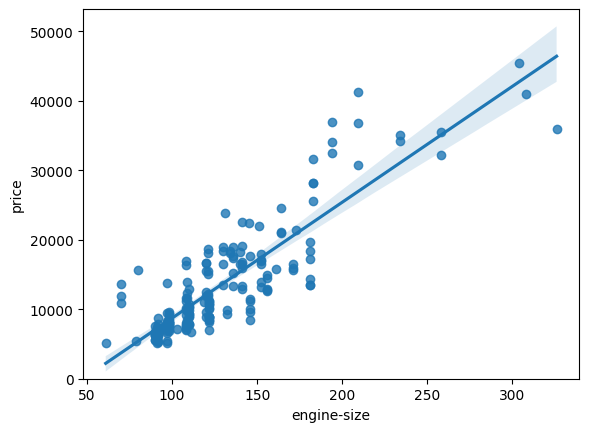

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)   # To ensure that price does not show negative value on the plot

In [9]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

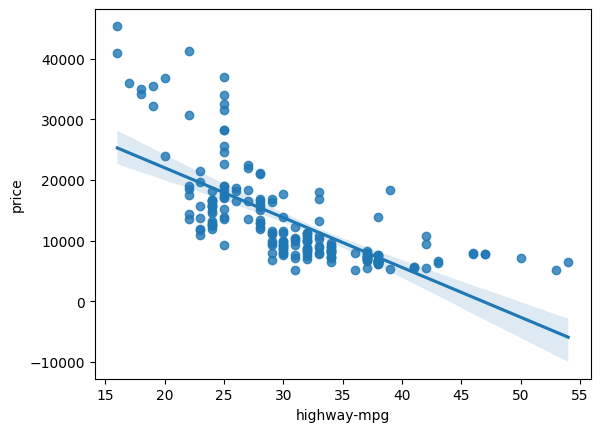

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)
#plt.ylim(0,)

In [11]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

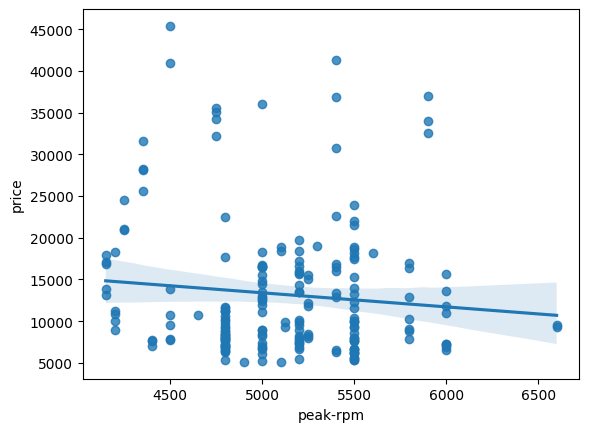

In [12]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [13]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

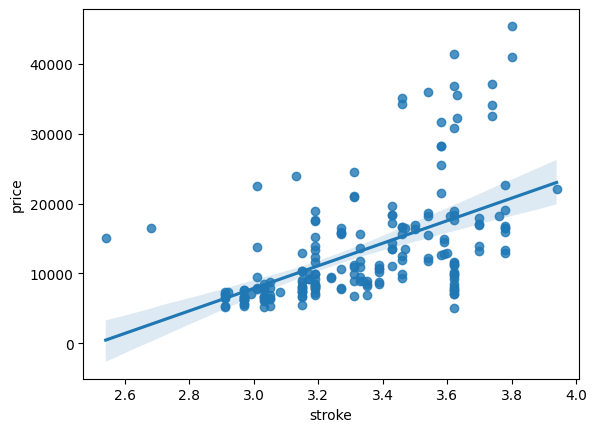

In [14]:
sns.regplot(x="stroke", y="price", data=df)

In [15]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.000000,0.543155
price,0.543155,1.000000


<Axes: xlabel='body-style', ylabel='price'>

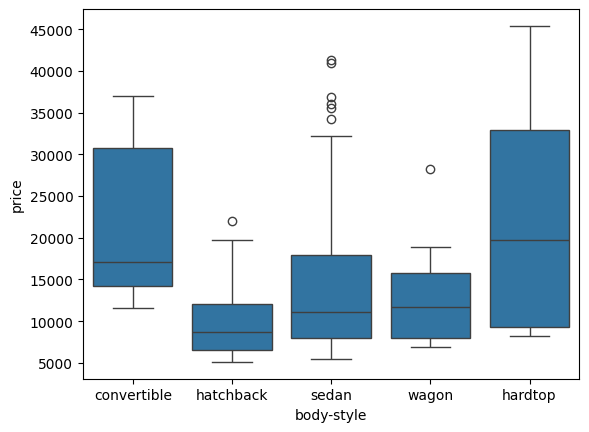

In [16]:
sns.boxplot(x="body-style", y="price", data=df)    # Use 'boxplot' for categorical variables

<Axes: xlabel='engine-location', ylabel='price'>

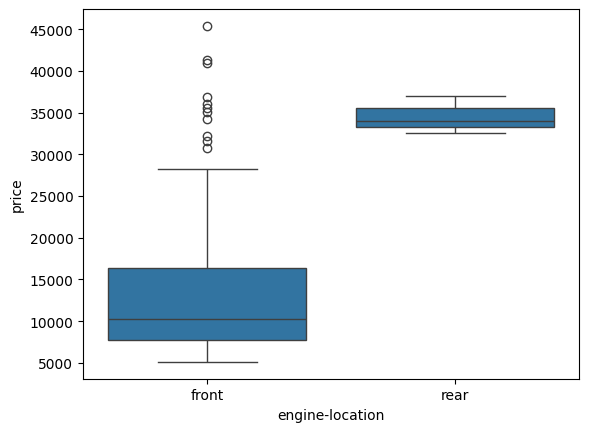

In [17]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

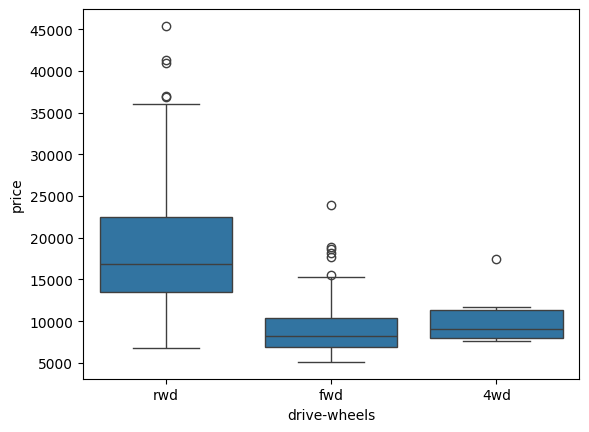

In [18]:
sns.boxplot(x="drive-wheels", y="price", data=df)

# ***Descriptive*** **Analysis**

In [19]:
df.describe()      # NOTE: The default setting of "describe" skips variables of type object.

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.256874,3.330692,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.316048,0.268072,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.070000,2.540000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.110000,3.150000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.290000,3.310000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.410000,3.580000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,4.170000,3.940000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [20]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [21]:
# NOTE: the method value_count only works in pandas series and not in dataframe
df[['drive-wheels']].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [22]:
# Convert series to  dataframe using 'to_frame()' func
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [23]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'})   # Rename 'drive-wheels' to 'value-counts'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [24]:
# Rename index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [26]:
# Repeat the same procedure for 'engine location' variable
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts.head(10)

,count
engine-location,
front,198
rear,3


### **BASICS OF GROUPING**

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [30]:
df.dtypes

,0
Unnamed: 0,int64
symboling,int64
normalized-losses,int64
make,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [32]:
# Grouping results
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test_1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [33]:
grouped_pivot = grouped_test_1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [35]:
# To find the average price each car based on the body style
# Grouped results

df_gptest = df[['body-style', 'price']]
grouped_test_2 = df_gptest.groupby(['body-style'], as_index=False).mean()
grouped_test_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


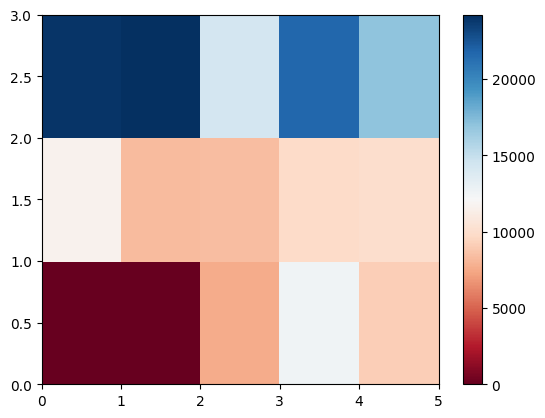

In [36]:
# Use grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#fig, ax = plt.subplot()

In Matplotlib, plt.subplot() is used to create multiple plots (subplots) in a single figure. It helps organize plots in a grid-like structure.



   ***ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)***

.set_xticks() sets the positions of ticks on the x-axis.
np.arange(grouped_pivot.shape[1]):
grouped_pivot.shape[1] gives the number of columns in the DataFrame (grouped_pivot).
np.arange() creates an array from 0 to the number of columns minus one.
For example, if there are 4 columns, it generates: [0, 1, 2, 3]
+ 0.5:
Shifts the tick positions by 0.5 to center them in the middle of each cell.
minor=False:
Specifies that these are major ticks.

Why Use + 0.5?
In heatmaps, each cell is centered on its grid line intersection.
Adding 0.5 ensures the ticks are centered in each cell, rather than at the edges.


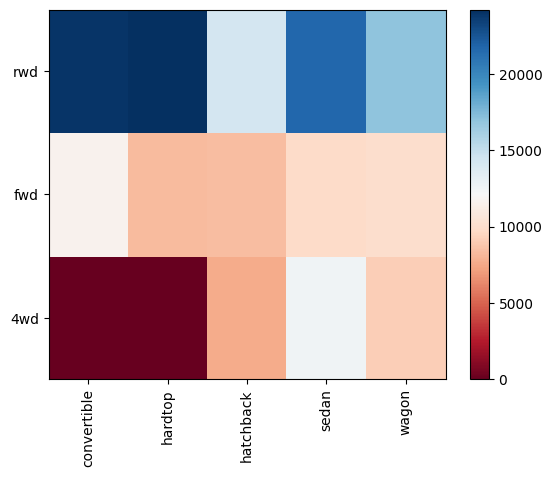

In [37]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### **CORRELATION AND CAUSATION**

In [38]:
from scipy import stats

Pearson Correlation Coefficient and p-value
The Pearson correlation coefficient and p-value are commonly used statistical measures to determine the strength and significance of the linear relationship between two variables.

# Syntax
*from scipy import stats*

# Calculate Pearson correlation and p-value
*r, p_value = stats.pearsonr(x, y)*

*print(f"Pearson Correlation Coefficient (r): {r}")*
*print(f"p-value: {p_value}")*

In [39]:
# wheel-base vs Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.584641822265508 with a p_value of p= 8.076488270732885e-20


In [40]:
# Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The pearson coefficient is", pearson_coef, "with a p_value of p=", p_value)

The pearson coefficient is 0.8096068016571054 with a p_value of p= 6.273536270650351e-48


In [41]:
# Length vs Price
pearson_coef, P_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639 with a p_value of p= 6.273536270650351e-48


In [42]:
# Width vs Price
pearson_coef, P_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.7512653440522675 with a p_value of p= 6.273536270650351e-48


In [43]:
# Curb-weight vs Price
pearson_coef, P_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843 with a p_value of p= 6.273536270650351e-48


In [44]:
# Engine-size vs Price
pearson_coef, P_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185 with a p_value of p= 6.273536270650351e-48


In [45]:
# Bore vs Price
pearson_coef, P_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is 0.08226928855325809 with a p_value of p= 6.273536270650351e-48


In [46]:
# City-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is ", pearson_coef, "with a p_value of P = ", p_value)

The Pearson Correlation Coefficient is  -0.6865710067844678 with a p_value of P =  2.3211320655675098e-29


In [47]:
# Highway-mpg vs Price
pearson_coef, P_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a p_value of p=", p_value)

The Pearson Correlation Coefficient is -0.704692265058953 with a p_value of p= 2.3211320655675098e-29


# ***ANOVA: Analysis of variance***

In [52]:
# Method 1
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test_3 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test_3.head()
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [53]:
# Method 2
grouped_test_3 = df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test_3.head()
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [54]:
grouped_test_3.get_group('4wd')['price']

<ipython-input-54-bcbd4c196d4c>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test_3.get_group('4wd')['price']


,price
4,17450.0
136,7603.0
140,9233.0
141,11259.0
144,8013.0
145,11694.0
150,7898.0
151,8778.0


In [65]:
# ANOVA
# 'rwd', '4wd', and 'fwd'
f_value, p_value = stats.f_oneway(grouped_test_3.get_group('fwd')['price'], grouped_test_3.get_group('4wd')['price'], grouped_test_3.get_group('rwd')['price'])
print(f"ANOVA RESULT 'rwd', '4wd', and 'fwd': \nF_value = {f_value}, \nP_value = {p_value}\n")

ANOVA RESULT 'rwd', '4wd', and 'fwd': 
F_value = 67.95406500780398, 
P_value = 3.3945443577151245e-23



<ipython-input-65-799f854511c5>:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_value, p_value = stats.f_oneway(grouped_test_3.get_group('fwd')['price'], grouped_test_3.get_group('4wd')['price'], grouped_test_3.get_group('rwd')['price'])


In [64]:
# 'rwd' and '4wd'
f_value, p_value = stats.f_oneway(grouped_test_3.get_group('rwd')['price'], grouped_test_3.get_group('4wd')['price'])
print(f"ANOVA RESULT 'rwd' and '4wd': \nF_value = {f_value} \nP_value = {p_value}\n")

ANOVA RESULT 'rwd' and '4wd': 
F_value = 8.580681368924756, 
P_value = 0.004411492211225333



<ipython-input-64-071eb82c3dba>:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_value, p_value = stats.f_oneway(grouped_test_3.get_group('rwd')['price'], grouped_test_3.get_group('4wd')['price'])


In [68]:
# '4wd' and 'fwd'
f_value, p_value = stats.f_oneway(grouped_test_3.get_group('4wd')['price'], grouped_test_3.get_group('fwd')['price'])
print(f"ANOVA RESULTS '4wd' and 'fwd': \nF_value = {f_value} \nP_value = {p_value}\n ")

ANOVA RESULTS '4wd' and 'fwd': 
F_value = 0.665465750252303 
P_value = 0.41620116697845666
 


<ipython-input-68-61f68bfc93f0>:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_value, p_value = stats.f_oneway(grouped_test_3.get_group('4wd')['price'], grouped_test_3.get_group('fwd')['price'])


In [70]:
# 'rwd' and 'fwd'
f_value, p_value = stats.f_oneway(grouped_test_3.get_group('rwd')['price'], grouped_test_3.get_group('fwd')['price'])
print(f"ANOVA RESULTS 'rwd' and 'fwd': \nF_value = {f_value}  \nP_value = {p_value}\n")

ANOVA RESULTS 'rwd' and 'fwd': 
F_value = 130.55331609591104  
P_value = 2.235530635567824e-23



<ipython-input-70-6e6f36337bfe>:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_value, p_value = stats.f_oneway(grouped_test_3.get_group('rwd')['price'], grouped_test_3.get_group('fwd')['price'])
